In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

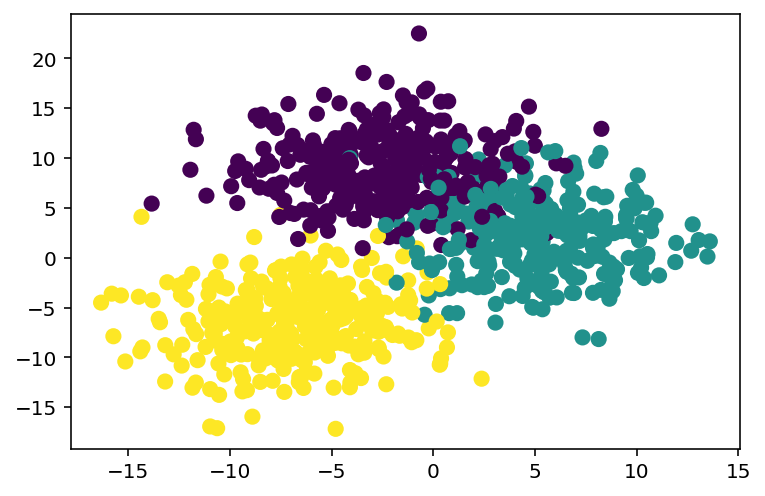

In [52]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=42, cluster_std=3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis');

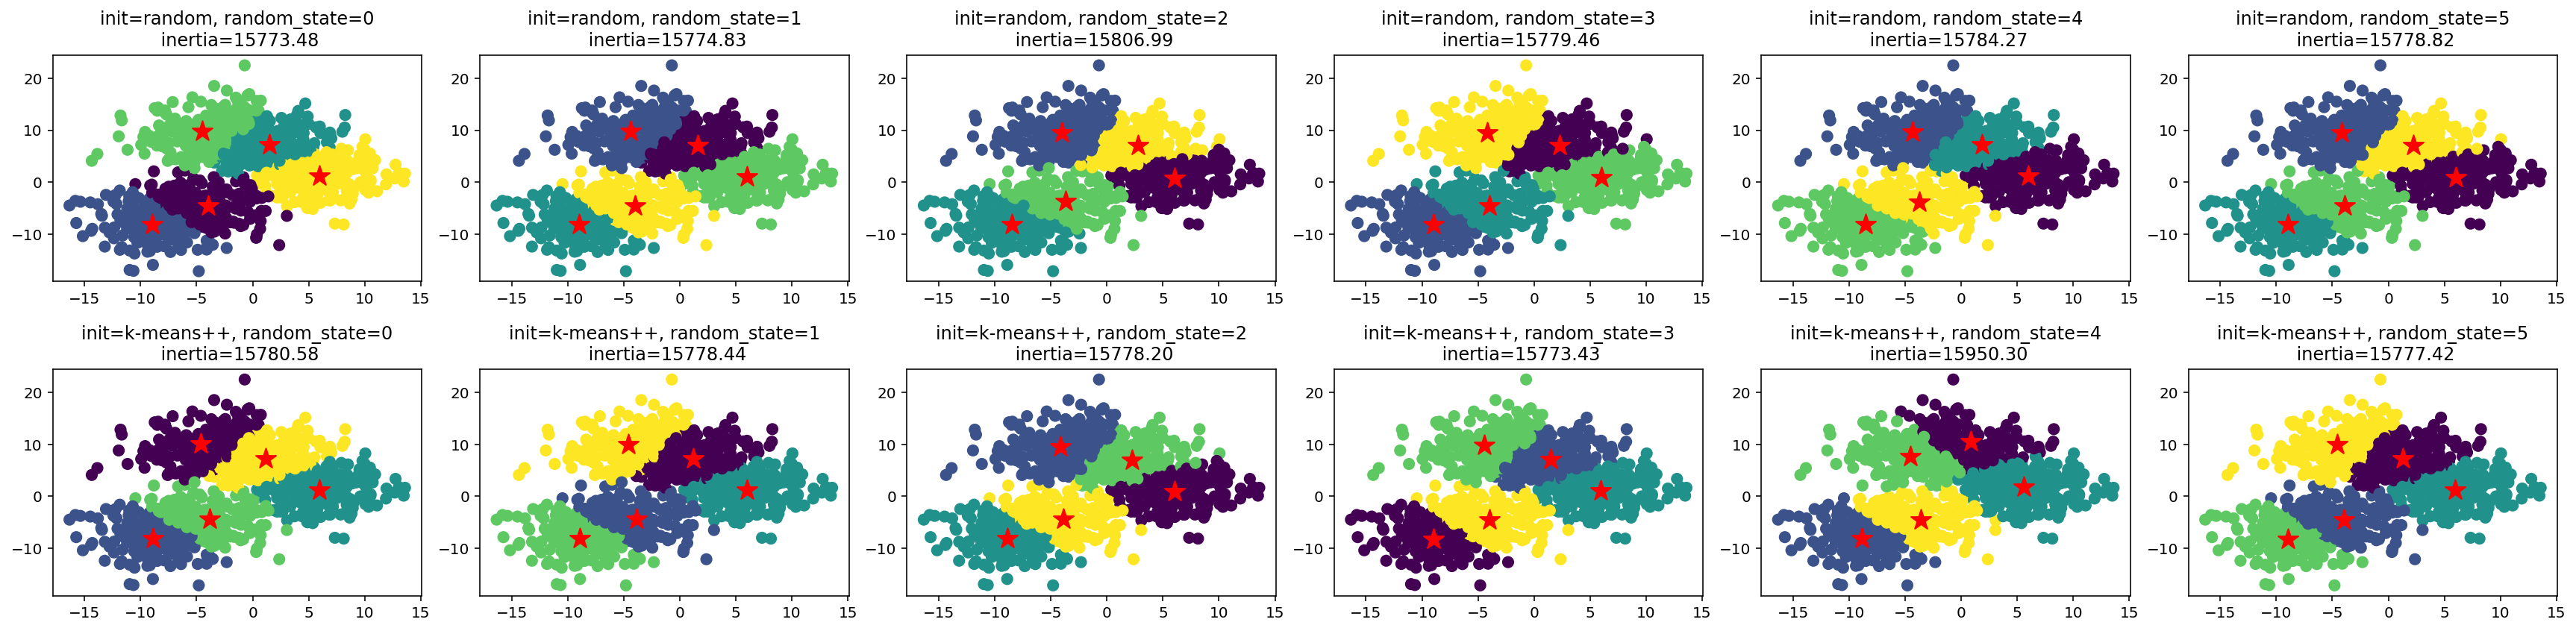

In [53]:
# Run k-means with 3 clusters with various initializations

from sklearn.cluster import KMeans
fig, ax = plt.subplots(2, 6, figsize=(24, 6))
for i, init in enumerate(['random', 'k-means++']):
    for j, random_state in enumerate(range(6)):
        km = KMeans(n_clusters=5, random_state=random_state*10, init=init)
        km.fit(X)
        y_km = km.predict(X)
        ax[i, j].scatter(X[:, 0], X[:, 1], c=y_km, s=50, cmap='viridis')
        ax[i, j].scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=200, marker='*', c='red')
        ax[i, j].set_title(f'init={init}, random_state={random_state}\n inertia={km.inertia_:.2f}')
        
fig.tight_layout()

We get the same result with different initializations!


![](kmeans.png)

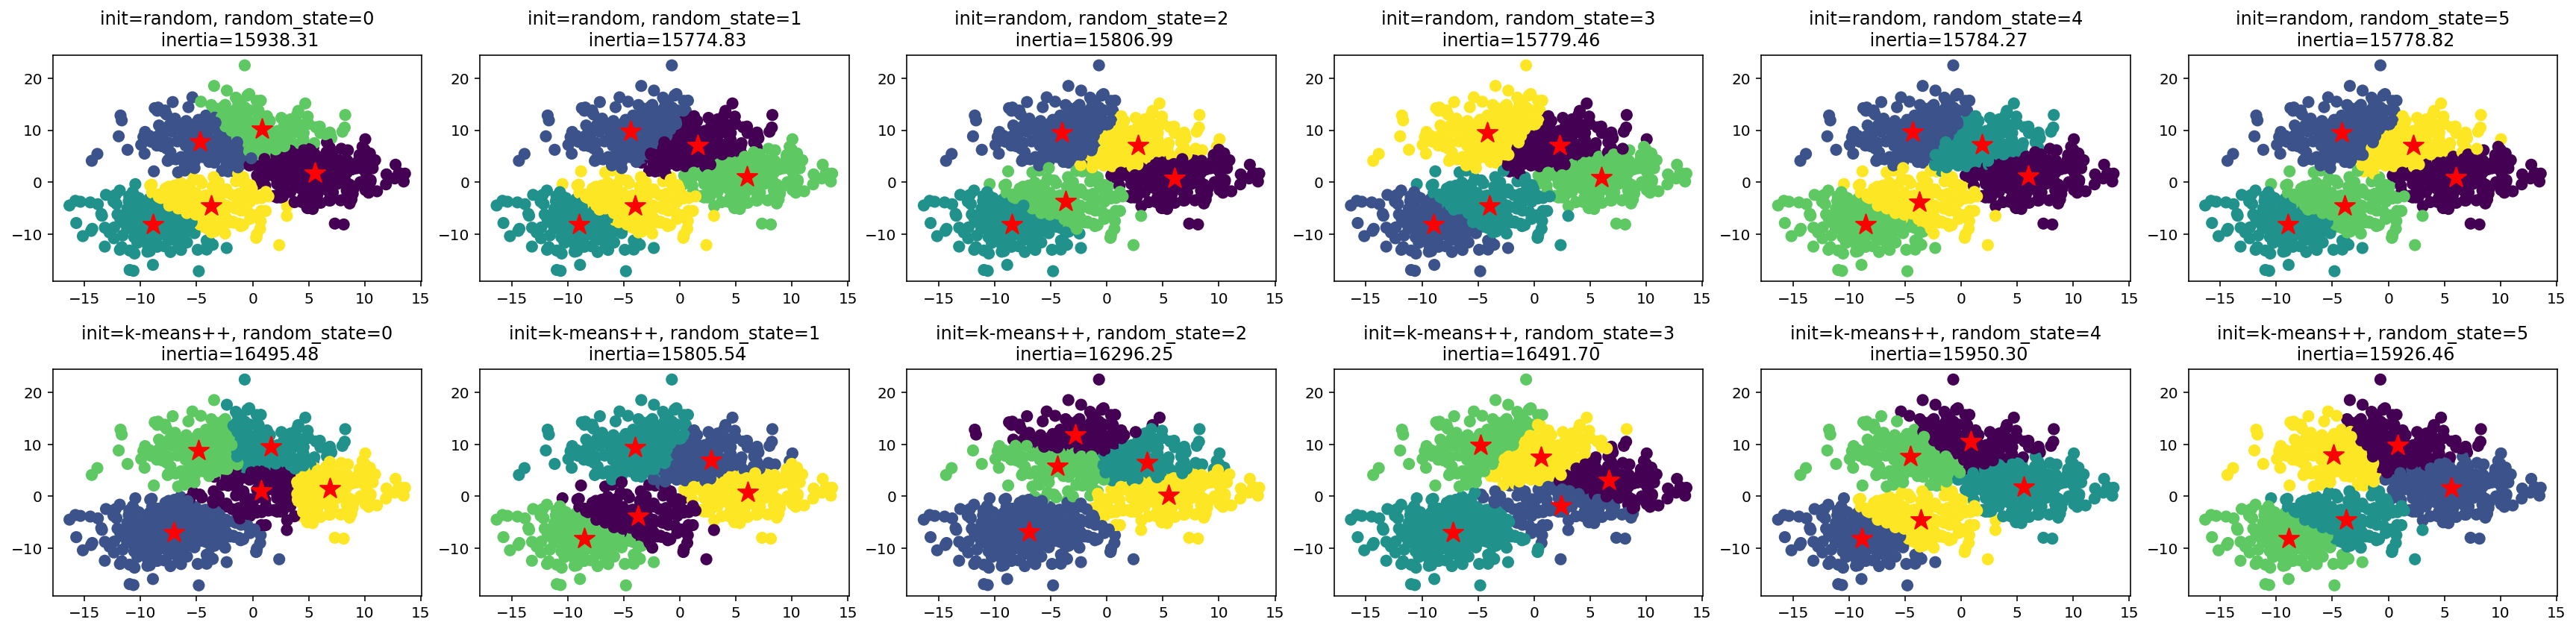

In [54]:
# Run k-means with 3 clusters with various initializations

from sklearn.cluster import KMeans
fig, ax = plt.subplots(2, 6, figsize=(24, 6))
for i, init in enumerate(['random', 'k-means++']):
    for j, random_state in enumerate(range(6)):
        km = KMeans(n_clusters=5, random_state=random_state*10, init=init,
                    n_init=1)
        km.fit(X)
        y_km = km.predict(X)
        ax[i, j].scatter(X[:, 0], X[:, 1], c=y_km, s=50, cmap='viridis')
        ax[i, j].scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=200, marker='*', c='red')
        ax[i, j].set_title(f'init={init}, random_state={random_state}\n inertia={km.inertia_:.2f}')
        
fig.tight_layout()      

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200, centers=3, n_features=2, random_state=42, cluster_std=3.5)

random_inertias = []
kmeans_inertias = []

# Run KMeans with random initialization and KMeans++ initialization
# for various number of clusters
for k in range(2, 7):
    random_inertias.append([])
    kmeans_inertias.append([])
    for i in range(10):
        #print(i, k)
        km_random = KMeans(n_clusters=k, init='random', n_init=1, random_state=i)
        km_kmeans = KMeans(n_clusters=k, init='k-means++', n_init=1, random_state=i)
        
        km_random.fit(X)
        km_kmeans.fit(X)
        random_inertias[-1].append(km_random.inertia_)
        kmeans_inertias[-1].append(km_kmeans.inertia_)


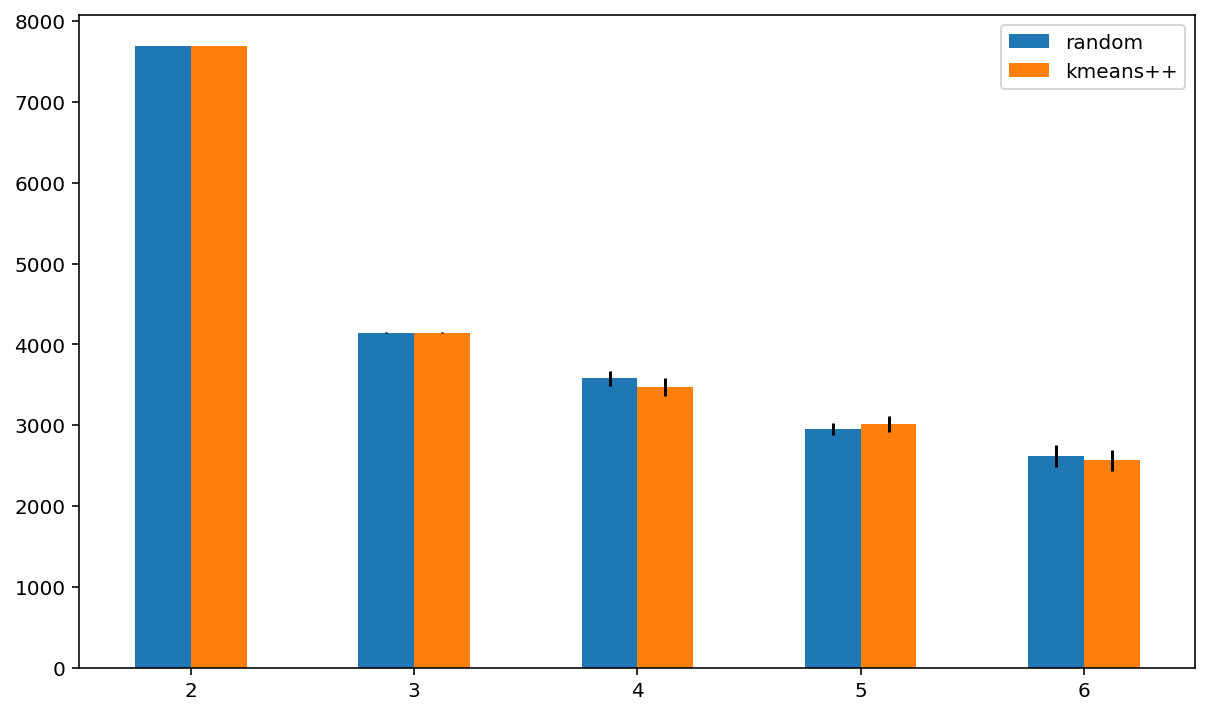

In [56]:
import pandas as pd
df = pd.DataFrame({'random': np.array(random_inertias).mean(axis=1),
                     'kmeans++': np.array(kmeans_inertias).mean(axis=1)},
                    index=range(2, 7))
yerr = pd.DataFrame({'random': np.array(random_inertias).std(axis=1),
                        'kmeans++': np.array(kmeans_inertias).std(axis=1)},
                          index=range(2, 7))
ax = df.plot(kind='bar', yerr=yerr, figsize=(10, 6), rot=0)



In [57]:
# Let us rather work in higher dimensions
X, y = make_blobs(n_samples=500, centers=3, n_features=10, random_state=42, cluster_std=3.5)

random_inertias = []
kmeans_inertias = []

# Run KMeans with random initialization and KMeans++ initialization
# for various number of clusters
for k in range(2, 7):
    random_inertias.append([])
    kmeans_inertias.append([])
    for i in range(10):
        #print(i, k)
        km_random = KMeans(n_clusters=k, init='random', n_init=1, random_state=i)
        km_kmeans = KMeans(n_clusters=k, init='k-means++', n_init=1, random_state=i)
        
        km_random.fit(X)
        km_kmeans.fit(X)
        random_inertias[-1].append(km_random.inertia_)
        kmeans_inertias[-1].append(km_kmeans.inertia_)


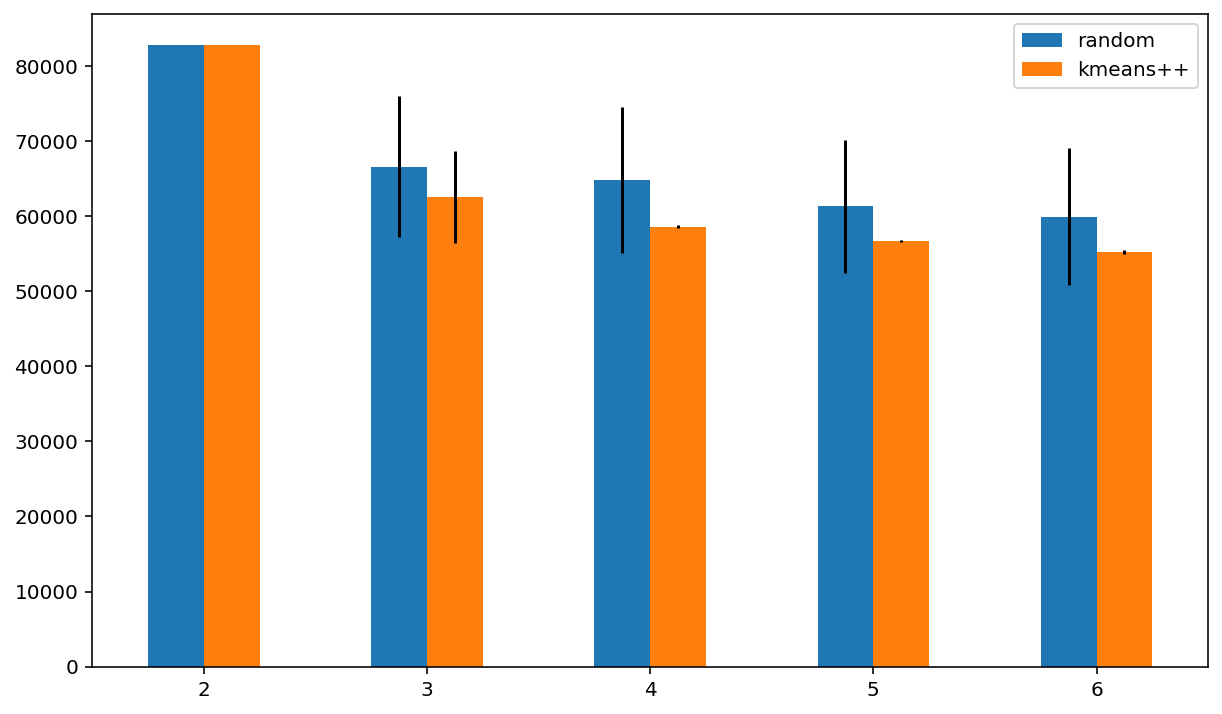

In [58]:
df = pd.DataFrame({'random': np.array(random_inertias).mean(axis=1),
                     'kmeans++': np.array(kmeans_inertias).mean(axis=1)},
                    index=range(2, 7))
yerr = pd.DataFrame({'random': np.array(random_inertias).std(axis=1),
                        'kmeans++': np.array(kmeans_inertias).std(axis=1)},
                          index=range(2, 7))
ax = df.plot(kind='bar', yerr=yerr, figsize=(10, 6), rot=0)
